# Ve≈æba 3: EDA
---



Prvo je potrebno uƒçitati biblioteke za rad sa podacima i iscrtavanje.

In [1]:
# uƒçitavanje biblioteka
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# pode≈°avanja ispisa
pd.set_option('display.float_format', lambda x: '%.2f' % x) # prikaz df na 2 decimale (npr. za describe)
celzijusi = u'\N{DEGREE SIGN}C' # oznaka za stepene celzijusa

U radni folder kopirati datoteku *city_temperature.csv*. Podatke mo≈æete naƒái [ovde](https://www.kaggle.com/sudalairajkumar/daily-temperature-of-major-cities/data?select=city_temperature.csv).

Treba uƒçitati skup podataka o proseƒçnim dnevnim temperaturama u najveƒáim svetskim gradovima. Kog formata su podaci? ≈†ta se nalazi po vrstama, a ≈°ta po kolonama - ≈°ta su uzorci, a ≈°ta obele≈æja? Koliko ima uzoraka, a koliko obele≈æja? Za odgovor na ova pitanja iskoristiti `shape` i `dtypes`.


In [2]:
!gdown 1mig6WygA9fCZlKSRf0FQFLqXc241-qVd

Downloading...
From (original): https://drive.google.com/uc?id=1mig6WygA9fCZlKSRf0FQFLqXc241-qVd
From (redirected): https://drive.google.com/uc?id=1mig6WygA9fCZlKSRf0FQFLqXc241-qVd&confirm=t&uuid=c11f6405-d2ca-4e75-b7df-fdf864eeb15f
To: /content/city_temperature.csv
100% 141M/141M [00:01<00:00, 99.1MB/s]


In [3]:
# uƒçitavanje u dataframe format
df = pd.read_csv('city_temperature.csv')

# format podataka
print("shape: \n", df.shape)
print("\n types:\n", df.dtypes, "\n")
df.head()


/tmp/ipython-input-3-2471910960.py:2: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('city_temperature.csv')


shape: 
 (2906327, 8)

 types:
 Region             object
Country            object
State              object
City               object
Month               int64
Day                 int64
Year                int64
AvgTemperature    float64
dtype: object 



Region  Country State     City  Month  Day  Year  AvgTemperature
0  Africa  Algeria   NaN  Algiers      1    1  1995           64.20
1  Africa  Algeria   NaN  Algiers      1    2  1995           49.40
2  Africa  Algeria   NaN  Algiers      1    3  1995           48.80
3  Africa  Algeria   NaN  Algiers      1    4  1995           46.40
4  Africa  Algeria   NaN  Algiers      1    5  1995           47.90

Podaci za temperaturu su u farenhajtima, te ih zarad lak≈°e interpretacije treba pretvoriti u celzijuse po formuli:

T_celzijus = (T_farenhajt - 32) * 5/9.

In [4]:
# Pretvaranje farenhajta u celzijuse
to_celsius = (df['AvgTemperature'] - 32) * 5 / 9
df['AvgTemperature'] = np.round(to_celsius, 2)
df.head()

Region  Country State     City  Month  Day  Year  AvgTemperature
0  Africa  Algeria   NaN  Algiers      1    1  1995           17.89
1  Africa  Algeria   NaN  Algiers      1    2  1995            9.67
2  Africa  Algeria   NaN  Algiers      1    3  1995            9.33
3  Africa  Algeria   NaN  Algiers      1    4  1995            8.00
4  Africa  Algeria   NaN  Algiers      1    5  1995            8.83

Proveriti da li je skup podataka potpun kori≈°ƒáenjem funkcije `isnull` i koliko podataka nedostaje u odnosu na ukupan broj uzoraka.

In [5]:
NANs = df.isnull().sum()
print(NANs)
udeo = df.isnull().sum()/len(df)*100
print("\n Procenat NaN: \n", udeo)

Region                  0
Country                 0
State             1450990
City                    0
Month                   0
Day                     0
Year                    0
AvgTemperature          0
dtype: int64

 Procenat NaN: 
 Region            0.00
Country           0.00
State            49.93
City              0.00
Month             0.00
Day               0.00
Year              0.00
AvgTemperature    0.00
dtype: float64


Proveriti koliko razliƒçitih regiona, dr≈æava i saveznih dr≈æava se nalazi u podacima (pomoƒá: nazivi kolona su *Region*, *Country* i *State*).

In [6]:
print('Regioni: \n', df['Region'].unique())
print('\n Dr≈æave: \n', df['Country'].unique())
print('\n Savezne dr≈æave: \n', df['State'].unique())

Regioni: 
 ['Africa' 'Asia' 'Australia/South Pacific' 'Europe' 'Middle East'
 'North America' 'South/Central America & Carribean']

 Dr≈æave: 
 ['Algeria' 'Burundi' 'Benin' 'Central African Republic' 'Congo' 'Egypt'
 'Ethiopia' 'Gabon' 'Gambia' 'Guinea' 'Guinea-Bissau' 'Ivory Coast'
 'Kenya' 'Morocco' 'Madagascar' 'Mauritania' 'Malawi' 'Mozambique'
 'Namibia' 'Nigeria' 'Senegal' 'Sierra Leone' 'South Africa' 'Togo'
 'Tunisia' 'Tanzania' 'Uganda' 'Zambia' 'Bangladesh' 'China' 'Hong Kong'
 'India' 'Indonesia' 'Japan' 'Kazakhstan' 'Kyrgyzstan' 'Laos' 'Malaysia'
 'Mongolia' 'Myanmar (Burma)' 'Nepal' 'North Korea' 'Pakistan'
 'Philippines' 'Singapore' 'South Korea' 'Sri Lanka' 'Taiwan' 'Tajikistan'
 'Thailand' 'Turkmenistan' 'Uzbekistan' 'Vietnam' 'Australia'
 'New Zealand' 'Albania' 'Austria' 'Belarus' 'Belgium' 'Bulgaria'
 'Croatia' 'Cyprus' 'Czech Republic' 'Denmark' 'Finland' 'France'
 'Germany' 'Georgia' 'Greece' 'Hungary' 'Iceland' 'Ireland' 'Italy'
 'Latvia' 'Macedonia' 'The Netherla

S obzirom da obele≈æje *State* postoji samo za ameriƒçke gradove, to obele≈æje se mo≈æe izbaciti iz razmatranja. Ako u kasnijoj analizi bude potrebno detaljnije ispitivanje ameriƒçkih gradova po dr≈æavama, mo≈æe se ponovo uzeti u obzir.

In [7]:
df.drop(['State'], inplace= True, axis = 1)

Izbacivanjem obele≈æja *State* je re≈°en problem nedostajuƒáih podataka, pa se mogu analizirati ostala obele≈æja. Sledeƒáe treba izraƒçunati osnovne statistiƒçke veliƒçine za svako od obele≈æja pomoƒáu funkcije `describe`.

In [8]:
print(df.describe())

           Month        Day       Year  AvgTemperature
count 2906327.00 2906327.00 2906327.00      2906327.00
mean        6.47      15.72    2006.62           13.34
std         3.46       8.80      23.38           17.85
min         1.00       0.00     200.00          -72.78
25%         3.00       8.00    2001.00            7.67
50%         6.00      16.00    2007.00           16.94
75%         9.00      23.00    2013.00           24.17
max        12.00      31.00    2020.00           43.33


Na osnovu minimalne i maksimalne vrednosti, mo≈æe se videti da mesec ide od 1 do 12, ≈°to deluje u redu. Dani idu od 0 do 31, ≈°to nije u skladu sa oƒçekivanjima. Razlog je najverovatnije zamena nedostajuƒáih vrednosti za obele≈æje *Day* nulama, ≈°to bi moglo da uzrokuje probleme pri daljoj analizi. Kod obele≈æja *Year* sumnjivo je postojanje 200. godine. Ispisom svih razliƒçitih vrednosti godina iz baze se mo≈æe videti da li je to gre≈°ka ili mo≈æda oznaka za nedostajuƒáu vrednost. Takoƒëe se primeƒáuje da je najni≈æa temperatura ƒçak -72.78, ≈°to teoretski mo≈æe biti stvarna vrednost (najni≈æa zabele≈æena temperatura je -89 na Antarktiku), meƒëutim imajuƒái u vidu da se meri u gradovima i pogotovo ako ima veƒái broj takvih vrednosti, onda je najverovatnije -72.78 C tj. -99 F bila oznaka za nedostajuƒáe vrednosti.

In [9]:
print(df['Year'].unique())

[1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008
 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020  201  200]


Po svemu sudeƒái, vrednosti 200 i 201 su gre≈°ke i treba ih nekako zameniti pre poƒçetka analize. Za poƒçetak, nedozvoljene vrednosti godine i dana treba zameniti sa `NaN` kako bi bilo jasnije ≈°ta predstavljaju, a kasnije i temperaturu izanalizirati i srediti.

In [10]:
df['Day'] = df['Day'].replace(0, np.nan)
df['Year'] = df['Year'].replace(200, np.nan)
df['Year'] = df['Year'].replace(201, np.nan)

Utvrditi koliko je nedostajuƒáih vrednosti u svakoj od varijabli i re≈°iti problem. Kog su tipa  nedostajuƒái podaci u ovom skupu? Da li je interpolacija pomoƒáu funkcije `fillna` odgovarajuƒáa metoda ili je bolji pristup brisanje?

In [11]:
print('Day: broj uzoraka:', df['Day'].isna().sum(), 'tj.', df['Day'].isna().sum()/len(df)*100, '%')
print('Year: broj uzoraka:', df['Year'].isna().sum(), 'tj.', df['Year'].isna().sum()/len(df)*100, '%')

Day: broj uzoraka: 8 tj. 0.000275261524253809 %
Year: broj uzoraka: 440 tj. 0.015139383833959495 %


Kako za dan i godinu vrlo mali broj uzoraka nedostaje (ispod 1%), ovi uzorci se mogu obrisati. Za dopunu podataka bi bilo potrebno proveriti kada dolazi do nedostajuƒáih vrednosti: npr. da li u bazi dani idu redom, pa se nedostajuƒáa vrednost mo≈æe popuniti na osnovu prethodne i naredne vrednosti. Kada je obele≈æje godine u pitanju, mo≈æe se primeniti sliƒçan pristup. Zarad jednostavnosti, u ovoj ve≈æbi ƒáe se obrisati uzorci tj. redovi gde nisu poznate vrednosti za dan ili godinu.

In [12]:
# brisanje
df.dropna(inplace = True, axis=0)

# zamena medijanom bi se radila na sledeƒái naƒçin:
#df['Day'].fillna(df['Day'].median(), inplace = True)
#df['Year'].fillna(df['Year'].median(), inplace = True)

Sledeƒáe treba odrediti koliko je nedostajuƒáih vrednosti za proseƒçnu temperaturu po gradu. Prvo se mo≈æe proveriti koliko je ƒçesto da temperatura bude ispod -60, i tim redovima dodeliti `NaN` za vrednost temperature.

In [13]:
df.loc[df['AvgTemperature'] < -60,'AvgTemperature'] = np.nan
print('AvgTemperature: broj uzoraka:', df['AvgTemperature'].isna().sum(), 'tj.', df['AvgTemperature'].isna().sum()/len(df)*100, '%')

AvgTemperature: broj uzoraka: 79224 tj. 2.726335129576971 %


Gradovi kojima nedostaje vi≈°e od 10 % podataka se mogu ignorisati tj. izbrisati iz baze, a za ostale ƒáemo dopuniti vrednosti propagirajuƒái poslednju validnu vrednost do naredne validne vrednosti. Napraviti listu svih gradova koje treba obrisati.

In [14]:
gb = df.groupby(by='City').count() # broji validne vrednosti po obele≈æju za svaki grad (samo za AvgTemperature postoje NaN)
del_city = []
for i in df['City'].unique():
    if gb.loc[i, 'AvgTemperature']/gb.loc[i,'Day'] < 0.9:
        del_city.append(i)
print(del_city)

['Bujumbura', 'Addis Ababa', 'Banjul', 'Conakry', 'Bissau', 'Nairobi', 'Lilongwe', 'Lagos', 'Freetown', 'Kampala', 'Dhaka', 'Jakarta', 'Katmandu', 'Dusanbe', 'Tirana', 'Nicosia', 'Bonn', 'Frankfurt', 'Hamburg', 'Muscat', 'Guadalajara', 'Georgetown', 'Port au Prince', 'Paramaribo', 'San Juan Puerto Rico']


In [15]:
print(gb)

              Region  Country  Month   Day  Year  AvgTemperature
City                                                            
Abidjan         9266     9266   9266  9266  9266            9002
Abilene         9266     9266   9266  9266  9266            9238
Abu Dhabi       9266     9266   9266  9266  9266            9232
Addis Ababa     9266     9266   9266  9266  9266            7143
Akron Canton    9265     9265   9265  9265  9265            9249
...              ...      ...    ...   ...   ...             ...
Yerevan         3226     3226   3226  3226  3226            3188
Youngstown      9265     9265   9265  9265  9265            9249
Yuma            4380     4380   4380  4380  4380            4087
Zagreb          9265     9265   9265  9265  9265            8813
Zurich          9266     9266   9266  9266  9266            9229

[321 rows x 6 columns]


In [16]:
print('Broj uzoraka i obelezja pre brisanja: ', df.shape)
print('Broj jedinstvenih gradova pre brisanja: ', len(df['City'].unique()))
df = df[~df['City'].isin(del_city)]
#for c in del_city:
#    df.drop(df.loc[df['City']==c].index, axis=0, inplace=True)
print('Broj uzoraka i obelezja posle brisanja: ', df.shape)
print('Broj jedinstvenih gradova posle brisanja: ', len(df['City'].unique()))

Broj uzoraka i obelezja pre brisanja:  (2905879, 7)
Broj jedinstvenih gradova pre brisanja:  321
Broj uzoraka i obelezja posle brisanja:  (2716826, 7)
Broj jedinstvenih gradova posle brisanja:  296


Ostalo je da se uradi dopuna preostalih nedostajuƒáih vrednosti ponavljanjem poslednje prethodne validne.

In [17]:
print(df.isnull().sum())
df['AvgTemperature'].fillna(method='ffill', inplace=True)
print(df.isnull().sum())

Region                0
Country               0
City                  0
Month                 0
Day                   0
Year                  0
AvgTemperature    22884
dtype: int64


/tmp/ipython-input-17-3588780324.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['AvgTemperature'].fillna(method='ffill', inplace=True)
/tmp/ipython-input-17-3588780324.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['AvgTemperature'].fillna(method='ffill', inplace=True)


Region            0
Country           0
City              0
Month             0
Day               0
Year              0
AvgTemperature    0
dtype: int64


In [18]:
df.describe()

Month        Day       Year  AvgTemperature
count 2716826.00 2716826.00 2716826.00      2716826.00
mean        6.47      15.72    2006.97           15.45
std         3.46       8.80       7.29           10.64
min         1.00       1.00    1995.00          -45.56
25%         3.00       8.00    2001.00            8.17
50%         6.00      16.00    2007.00           16.94
75%         9.00      23.00    2013.00           24.06
max        12.00      31.00    2020.00           43.33

Prikazati *boxplot* dijagrame i histograme za proseƒçnu godi≈°nju temperaturu po regionu kori≈°ƒáenjem `boxplot` i `hist` iz biblioteke `Matplotlib`.

In [19]:
# postaviti region za indeks zbog lak≈°eg pretra≈æivanja pomoƒáu dataframe.loc[]
df_region = df.set_index('Region')
df_region.head()

Country     City  Month  Day    Year  AvgTemperature
Region                                                      
Africa  Algeria  Algiers      1 1.00 1995.00           17.89
Africa  Algeria  Algiers      1 2.00 1995.00            9.67
Africa  Algeria  Algiers      1 3.00 1995.00            9.33
Africa  Algeria  Algiers      1 4.00 1995.00            8.00
Africa  Algeria  Algiers      1 5.00 1995.00            8.83

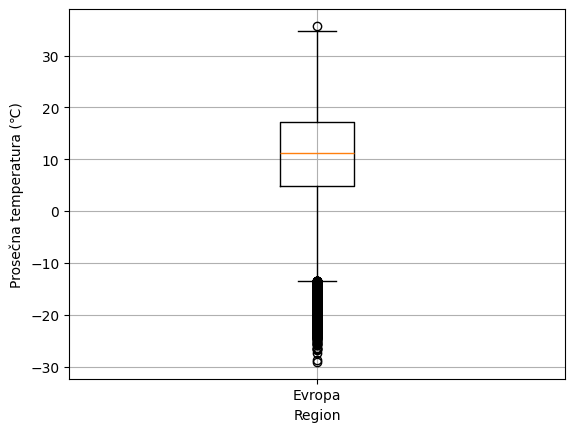

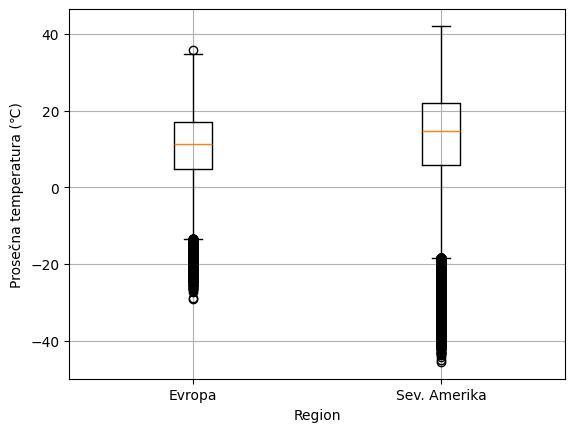

In [20]:
# boxplot

plt.boxplot(df_region.loc['Europe','AvgTemperature'])
plt.ylabel('Proseƒçna temperatura (‚ÑÉ)')
plt.xlabel('Region')
plt.xticks([1], ["Evropa"])
plt.grid()

# prikazati uporedo Evropu i Severnu Ameriku
plt.figure()
plt.boxplot([df_region.loc['Europe','AvgTemperature'], df_region.loc['North America','AvgTemperature']])
plt.ylabel('Proseƒçna temperatura (‚ÑÉ)')
plt.xlabel('Region')
plt.xticks([1, 2], ["Evropa", "Sev. Amerika"])
plt.grid()

# bonus: uporediti proseƒçne temperature po mesecima

Prikazati raspodelu temperatura u Evropi i Severnoj Americi pomoƒáu histograma. (Iskoristiti opciju za transparentnost histograma `alpha` kako bi se oba histograma mogla prikazati na istom grafiku.)

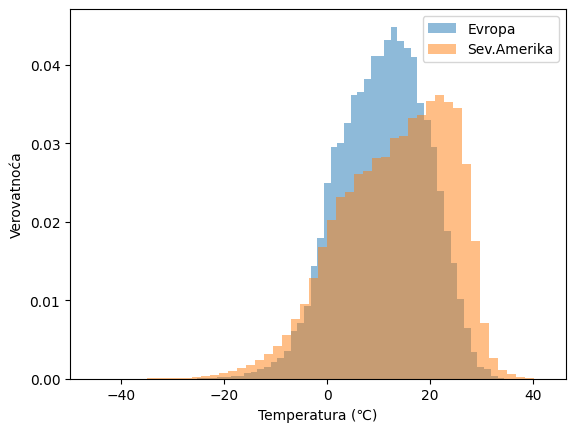

In [21]:
# histogram
plt.hist(df_region.loc['Europe','AvgTemperature'], density=True, alpha=0.5, bins=50, label = 'Evropa')
plt.hist(df_region.loc['North America','AvgTemperature'], density=True, alpha=0.5, bins=50, label='Sev.Amerika')

plt.xlabel('Temperatura (‚ÑÉ)')
plt.ylabel('Verovatnoƒáa')
plt.legend()

Kako se odnose raspodela temperatura 1995. i 2005. godine? Prikazati pomoƒáu histograma. (Iskoristiti opciju za transparentnost histograma alpha kako bi se oba histograma mogla prikazati na istom grafiku.)

In [22]:
# indeksirati po godini
df_year = df.set_index('Year')
df_year.tail()

Region Country      City  Month   Day  AvgTemperature
Year                                                                 
2020.00  North America      US  Cheyenne      5  9.00            5.72
2020.00  North America      US  Cheyenne      5 10.00            6.17
2020.00  North America      US  Cheyenne      5 11.00            3.22
2020.00  North America      US  Cheyenne      5 12.00            5.50
2020.00  North America      US  Cheyenne      5 13.00            9.17

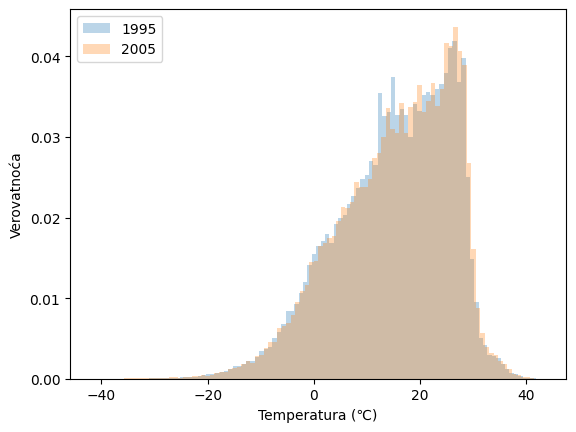

In [23]:
# histogram
plt.hist(df_year.loc[1995,'AvgTemperature'], bins=100, density=True, alpha=0.3, label='1995')
plt.hist(df_year.loc[2005,'AvgTemperature'], bins=100, density=True, alpha=0.3, label='2005')

plt.xlabel('Temperatura (‚ÑÉ)')
plt.ylabel('Verovatnoƒáa')
plt.legend(loc='upper left')

Izraƒçunati koeficijent asimetrije i koeficijent spljo≈°tenosti raspodele temperature za Evropu. Na osnovu ovih vrednosti, kakvu raspodelu mo≈æemo oƒçekivati?

In [24]:
from scipy.stats import kurtosis
from scipy.stats import skew

print('koef.asimetrije:  %.2f' % skew(df_region.loc['Europe','AvgTemperature']))
print('koef.spljo≈°tenosti:  %.2f' % kurtosis(df_region.loc['Europe','AvgTemperature']))

koef.asimetrije:  -0.24
koef.spljo≈°tenosti:  -0.23


Proveriti pretpostavke na osnovu koeficijenata asimetrije i spljo≈°tenosti. Da li raspodela godi≈°njih temperatura u Evropi u periodu od 1995. do 2020. godine pribli≈æno prati normalnu raspodelu?

/tmp/ipython-input-25-2963279595.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(temp_europe, fit=norm)


Text(0, 0.5, 'Verovatnoƒáa')

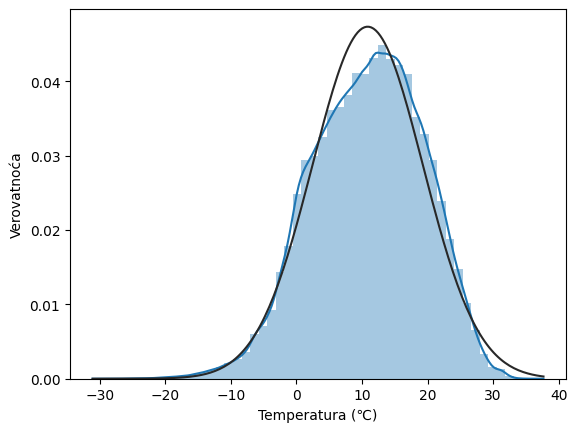

In [25]:
import seaborn as sb
from scipy.stats import norm
temp_europe = df_region.loc['Europe','AvgTemperature']
sb.distplot(temp_europe, fit=norm)
plt.xlabel('Temperatura (‚ÑÉ)')
plt.ylabel('Verovatnoƒáa')

Bolji uvid u promene temperature po godinama mogu ponuditi proseƒçne meseƒçne temperature. Izraƒçunati ih za svaki region koristeƒái funkciju 'groupby'.

In [34]:
gb = df.groupby(['Region', 'Month']).mean(numeric_only=True)
gb

Day    Year  AvgTemperature
Region                            Month                              
Africa                            1     15.99 2007.31           22.20
                                  2     14.64 2007.30           22.89
                                  3     16.00 2007.29           23.47
                                  4     15.50 2007.29           23.60
                                  5     15.86 2007.03           23.69
...                                       ...     ...             ...
South/Central America & Carribean 8     15.99 2006.65           21.64
                                  9     15.50 2006.64           21.85
                                  10    16.00 2006.64           21.95
                                  11    15.49 2006.63           21.77
                                  12    16.01 2006.63           21.96

[84 rows x 3 columns]

In [35]:
df.head()

Region  Country     City  Month  Day    Year  AvgTemperature
0  Africa  Algeria  Algiers      1 1.00 1995.00           17.89
1  Africa  Algeria  Algiers      1 2.00 1995.00            9.67
2  Africa  Algeria  Algiers      1 3.00 1995.00            9.33
3  Africa  Algeria  Algiers      1 4.00 1995.00            8.00
4  Africa  Algeria  Algiers      1 5.00 1995.00            8.83

In [36]:
for reg in df['Region'].unique():
  print(reg)
  print(gb.loc[reg, 'AvgTemperature'])

Africa
Month
1    22.20
2    22.89
3    23.47
4    23.60
5    23.69
6    23.41
7    23.36
8    23.82
9    24.32
10   24.50
11   23.63
12   22.65
Name: AvgTemperature, dtype: float64
Asia
Month
1    10.40
2    12.44
3    16.54
4    20.94
5    24.35
6    26.50
7    27.54
8    27.13
9    24.70
10   20.92
11   16.14
12   11.76
Name: AvgTemperature, dtype: float64
Australia/South Pacific
Month
1    22.34
2    22.16
3    20.46
4    17.38
5    14.33
6    12.00
7    11.15
8    12.06
9    14.24
10   16.40
11   18.62
12   20.65
Name: AvgTemperature, dtype: float64
Europe
Month
1     1.66
2     2.80
3     5.96
4    10.34
5    14.66
6    18.41
7    20.49
8    20.08
9    15.92
10   11.31
11    6.43
12    2.73
Name: AvgTemperature, dtype: float64
Middle East
Month
1    12.94
2    14.38
3    17.56
4    21.96
5    26.97
6    30.20
7    32.07
8    31.99
9    29.20
10   24.98
11   19.25
12   14.74
Name: AvgTemperature, dtype: float64
North America
Month
1     1.81
2     3.49
3     7.75
4    12.82
5    1

Kako bi se uporedio odnos proseƒçne meseƒçne temperature u Evropi i Aziji (ili nekom drugom regionu), iscrtati linijski grafik i grafik rasipanja. ≈†ta se mo≈æe zakljuƒçiti iz ovih grafika?

### üìà Uporeƒëenje proseƒçnih meseƒçnih temperatura: Linijski i scatter grafikon

#### üîπ Linijski grafikon

Linijski grafikon je idealan za prikaz **vremenskih serija** ‚Äì promena neke vrednosti tokom vremena (npr. po mesecima). U ovom sluƒçaju, linijski grafikon prikazuje proseƒçne meseƒçne temperature za:

- **Evropu** ‚Äì klasiƒçna umereno-kontinentalna klima: hladne zime, topla leta.
- **Aziju** ‚Äì znatno vi≈°e temperature tokom cele godine, posebno leti.
- **Australiju** ‚Äì suprotna sezonska dinamika (ju≈æna hemisfera): najhladnije je u julu, najtoplije u decembru.

üìå **Kljuƒçni zakljuƒçci:**
- Evropa i Azija imaju sliƒçan sezonski obrazac, ali Azija ima vi≈°e temperature u svim mesecima.
- Australija ima obrnuti sezonski tok (leto zimi).
- Azija pokazuje najizra≈æenije letnje temperature (juli/avgust), dok Australija leti ima bla≈æe temperature.

---

#### üîπ Scatter grafikon (rasipani dijagram)

Scatter grafikon prikazuje **odnos izmeƒëu dve numeriƒçke promenljive** ‚Äì u ovom sluƒçaju, proseƒçne temperature Evrope (X osa) i Azije (Y osa).

- Ako su taƒçke pribli≈æno rasporeƒëene uzlazno (kao dijagonala), to znaƒçi da postoji **pozitivna korelacija**.
- Ako je raspored rasut, **nema jasne veze**.

üìå **Zakljuƒçak za Evropu i Aziju:**
- Postoji **pozitivan odnos** ‚Äì kada raste temperatura u Evropi, raste i u Aziji.
- Meƒëutim, Azija ima **konzistentno vi≈°u temperaturu**, pa nije reƒç o savr≈°eno linearnom odnosu.
- Zimi se razlika poveƒáava jer Evropa ima mnogo ni≈æe temperature od Azije ‚Üí neidealna korelacija.

---

#### ‚úÖ Uporedna interpretacija:

| Grafikon        | ≈†ta pokazuje?                                                                 |
|------------------|-------------------------------------------------------------------------------|
| **Line plot**     | Sezonski obrasci u razliƒçitim regionima (vremenski tok i trendovi).           |
| **Scatter plot**  | Direktno poreƒëenje temperature izmeƒëu regiona ‚Äì da li se pona≈°aju sliƒçno.     |

üëâ Kombinovanjem ova dva grafikona dobijamo **kompletnu sliku**: i kako se temperatura menja tokom godine (line), i da li su regioni sliƒçni po profilu (scatter).


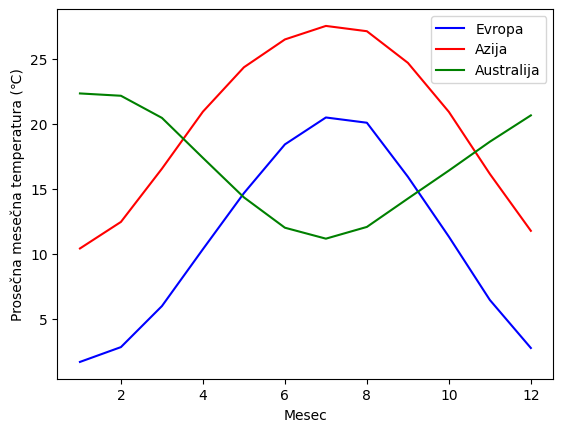

In [37]:
gb = df.groupby(by=['Region', 'Month']).mean(numeric_only=True)
T_evropa = gb.loc['Europe']['AvgTemperature']
T_azija = gb.loc['Asia']['AvgTemperature']
T_afrika = gb.loc['Africa']['AvgTemperature']
T_amerika = gb.loc['North America']['AvgTemperature']
T_australija = gb.loc['Australia/South Pacific']['AvgTemperature']
plt.plot(np.arange(1, 13, 1), T_evropa, 'b', label='Evropa')
plt.plot(np.arange(1, 13, 1), T_azija, 'r', label='Azija')
plt.plot(np.arange(1, 13, 1), T_australija, 'g', label='Australija')
plt.ylabel('Proseƒçna meseƒçna temperatura (‚ÑÉ)')
plt.xlabel('Mesec')
plt.legend();

Text(0, 0.5, 'Meseƒçna proseƒçna temperatura u Aziji (‚ÑÉ)')

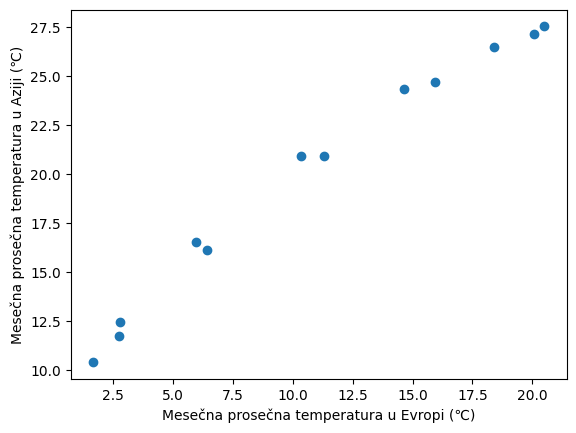

In [38]:
plt.scatter(T_evropa, T_azija)
plt.xlabel('Meseƒçna proseƒçna temperatura u Evropi (‚ÑÉ)')
plt.ylabel('Meseƒçna proseƒçna temperatura u Aziji (‚ÑÉ)')

Text(0, 0.5, 'Meseƒçna proseƒçna temperatura u Australiji (‚ÑÉ)')

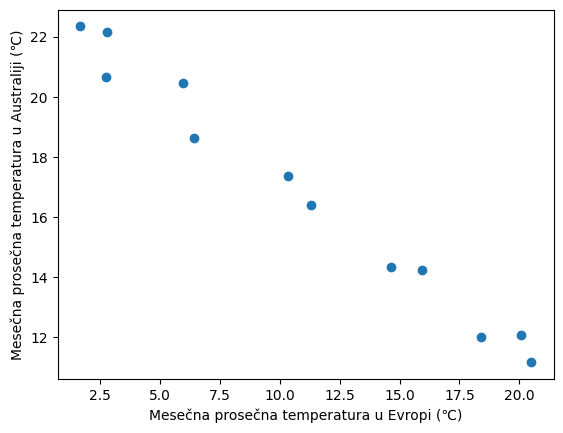

In [39]:
plt.scatter(T_evropa, T_australija)
plt.xlabel('Meseƒçna proseƒçna temperatura u Evropi (‚ÑÉ)')
plt.ylabel('Meseƒçna proseƒçna temperatura u Australiji (‚ÑÉ)')

Kako se meƒëusobno odnose proseƒçne meseƒçne temperatura u razliƒçitim regionima? Kolika je korelacija proseƒçne meseƒçne temperature u Evropi i Aziji (ili npr. Africi)?

In [40]:
df_month = pd.DataFrame()
for i in df_region.index.unique():
    df_month[i] = gb.loc[i, 'AvgTemperature']
c=df_month['Europe'].corr(df_month['Asia'])
print("korelacija: %.3f" % c)

korelacija: 0.989


In [41]:
df_month

Africa  Asia  Australia/South Pacific  Europe  Middle East  \
Month                                                               
1       22.20 10.40                    22.34    1.66        12.94   
2       22.89 12.44                    22.16    2.80        14.38   
3       23.47 16.54                    20.46    5.96        17.56   
4       23.60 20.94                    17.38   10.34        21.96   
5       23.69 24.35                    14.33   14.66        26.97   
6       23.41 26.50                    12.00   18.41        30.20   
7       23.36 27.54                    11.15   20.49        32.07   
8       23.82 27.13                    12.06   20.08        31.99   
9       24.32 24.70                    14.24   15.92        29.20   
10      24.50 20.92                    16.40   11.31        24.98   
11      23.63 16.14                    18.62    6.43        19.25   
12      22.65 11.76                    20.65    2.73        14.74   

       North America  South/Central America & Carribean  
Month                                                    
1               1.81                              22.02  
2               3.49                              22.29  
3               7.75                              22.41  
4              12.82                              22.43  
5              17.87                              21.83  
6              22.30                              21.35  
7              24.59                              21.24  
8              23.89                              21.64  
9              20.32                              21.85  
10             14.21                              21.95  
11              8.06                              21.77  
12              3.35                              21.96

Izraƒçunati korelaciju izmeƒëu proseƒçne temperature u Evropi i u svim ostalim regionima.

In [42]:
matrica_korelacije = df_month.corr()
print(matrica_korelacije['Europe'])

Africa                               0.59
Asia                                 0.99
Australia/South Pacific             -0.99
Europe                               1.00
Middle East                          0.99
North America                        1.00
South/Central America & Carribean   -0.71
Name: Europe, dtype: float64


Iscrtati matricu korelacije pomoƒáu `heatmap` iz biblioteke `Seaborn`.

<Axes: >

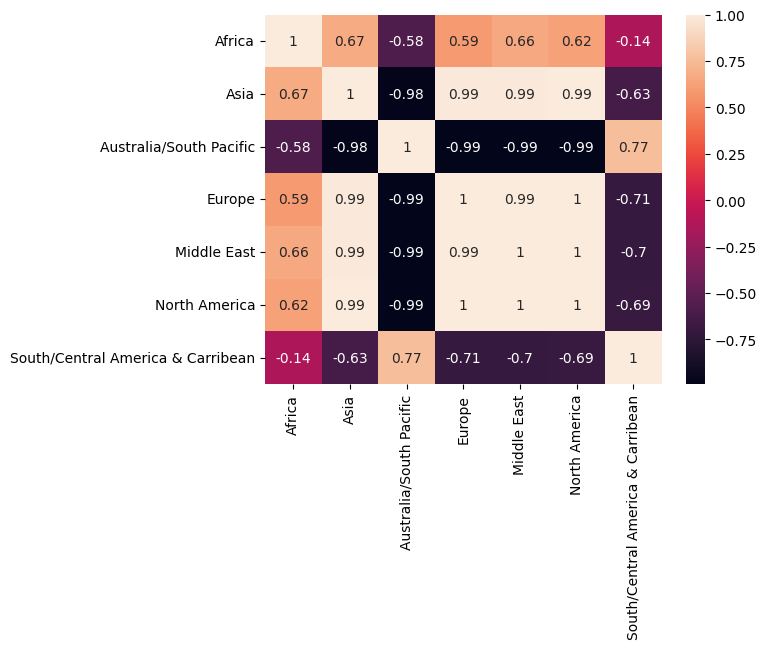

In [43]:
import seaborn as sb

sb.heatmap(matrica_korelacije, annot=True)

Kako se mo≈æe objasniti izra≈æena negativna korelacija izmeƒëu Evrope i Australije? Koji regioni su najvi≈°e korelisani?